# Quantifying the World - Fall 2021
## Case Study 5 | Firewall Rule Data
## Grant Bourzikas

## Abstract
The problem that has been brought to our data science team comes from cybersecurity community.  The data was collected from large organization, and they want to automate the creation of firewall rulesets. To classify the firewall rules, we will determine if they should be allowed, denied, dropped, or reset thus speeding up business and decreasing complexity in their environment

After reviewing the results of the algorithms, the clear winner was the SVC algorithm with 99.8.% accuracy because it did not introduce any risk to the organization and only had 28 false negatives.  While the model did take more time to run, the accuracy and protection of the organization was Top Notch. 


# Introduction
The problem that has been brought to our data science team comes from cybersecurity community.  The data was collected from large organization, and they want to automate the creation of firewall rulesets. To classify the firewall rules, we will determine if they should be allowed, denied, dropped, or reset thus speeding up business and decreasing complexity in their environment

The goal of the study is to develop and use Support Vector Machine (SVM) and Stochastic gradient descent (SGD) machine learning models. GridSearch and Randomized Search were not leveraged due to the data set size and the time it take to run multiple options (we did attempt but this did fail), but rather we leveraged our own python code to manipulate the various parameters in the algorithms to get an optimal score.   The “Action” feature is the independent variable (y) that will be used predict the whether the firewall traffic should be allowed, denied, dropped, or reset. One data files was received that contained the Firewall data which included over 65,532 records with 12 features.


In [57]:
print("Firewall Dataset - Rows:", fw.shape[0], "Columns/Features", fw.shape[1])

Firewall Dataset - Rows: 65532 Columns/Features 12


# Exploratory Data Analysis
After analyzing the data, it was discovered that that was a multiclass prediction specifically on the Action field.  


In [70]:
fw_DF.Action.value_counts().to_frame()

,Action
allow,37640
deny,14987
drop,12851
reset-both,54


After reviewing the data, certain data that appeared numeric, was categorical.  All of the port features, Source Port, Destination Port, Nat Source Port, and Nat Destination Port, represent a service that resides on an operating system and is not a number.  This data was one hot endcoded which changed the shape of the datset to 65,532 records with 57,686 features.

In [71]:
print("Firewall Dataset - Rows:", fw_DF.shape[0], "Columns/Features", fw_DF.shape[1])

Firewall Dataset - Rows: 65532 Columns/Features 57686


# Model Overview
After the exploratory data analysis was performed and one hot encoding was used, we develop and optimized the following three algorithms; however, because of the size of the data, we used a 80% train test split because of the time the model take to fit:
##### Model 1 – SVC with Optimized C
##### Model 2 - SGD Basic
##### Model 3 – SGD with Optimized Loss and Regularization


## Results
### Model 1 – SVC with Optimized C
For the SVC model, multiple attempts were made to optimize the regularization parameter, C, and it was determined the best value was C = 1. While we did attempt to run randomized search, the models were stopped after running for over 24 hours.   As opposed to running with C=1, this model took 32 minutes to fit and 5 hours to score but the model was 99.8% accurate.



In [72]:
print(f"The following is the Accuracy from the SVC Model {result_ACC:.1%}")

The following is the Accuracy from the SVC Model 99.8%


Reviewing the Confusion Matrix below, the key items are as follow:
- 30,106 - True Positive (TP): These are cases in which we predicted Allow and were Allow
- 22,292 - True Negative (TN): We predicted they were not Allow (deny, drop, reset), and they weren’t Allow.
- 0 - False Positive (FP): We predicted Allow and they were not Allow. (Type I error)
- 28 - False Negatives (FN): We predicted Not Allow, but they are Allow. (Type II error)

This means that the prediction did not work on only the 28 False Negatives which resulted in the 99.8% accuracy score.  In this scenario, we built a machine learning algorithm that was accurate and did not compromise any security of the organization (False Positives).  The only issue were the 28 connections we recommend Not Allowing but should have been Allowed (False Negatives).  However, this is reasonable and is a very strong model and is an easy fix to address.



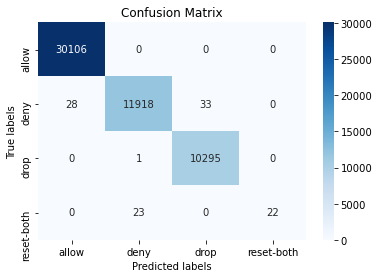

In [73]:
ax= plt.subplot()

cm_Result = confusion_matrix(y_test, preds)
sns.heatmap(cm_Result, cmap="Blues", annot=True, fmt='d', ax=ax) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']); ax.yaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']);


# Model 2 – SGD with Logistic Regression 
For the SGD model we used the loss logistic regression function (which uses logistic regression) and it took a little over 2 minutes to complete but had a 57.4% accuracy rate. While we built a confusion matrix to review the mistakes, the score didn’t warrant an explanation of the confusion matrix because the model results were poor.


In [74]:
print(f"SGD with Logistic Regression {clf_Score:.1%}")

SGD with Logistic Regression 57.4%


# Model 3 – SGD with Optimized Loss and Regularization
For the SGD model with Optimized Loss and Regularization, we tested the Log, Hinge, Modified Huber, Squared Hinge, and Perception loss functions using different Alpha values, 1E-3,1E-2, 1E-1, 1E+0 and 1E+1.  The top 5 Models were:


In [75]:
result_90.style.hide_index()

Loss,Alpha,Model_Fit,Score
hinge,0.001000,SGDClassifier(alpha=0.001),0.990062
perceptron,0.001000,"SGDClassifier(alpha=0.001, loss='perceptron')",0.975623
log,0.010000,"SGDClassifier(alpha=0.01, loss='log')",0.974497
squared_hinge,0.001000,"SGDClassifier(alpha=0.001, loss='squared_hinge')",0.971236
hinge,0.100000,SGDClassifier(alpha=0.1),0.957597
hinge,0.010000,SGDClassifier(alpha=0.01),0.943311
log,0.001000,"SGDClassifier(alpha=0.001, loss='log')",0.938885
modified_huber,0.001000,"SGDClassifier(alpha=0.001, loss='modified_huber')",0.869759


As noted above, the best performing model, scoring at 98.8% was leveraging the perception loss function with an Alpha of 1.0 which uses the perception algorithm which is one of the models heavily used in autonomous driving.  The second top performing model used Hinge and the third top model used Squared Hinge resulting in a 97.5% and 97.4% accuracy score respectively.

### Conclusion
After reviewing the results of the algorithms, the clear winner was the SVC with 99.8.% accuracy because it did not introduce any risk to the organization and only had 28 false negatives.  While the model did take more time to run, the accuracy and protection of the organization was Top Notch. 


In [2]:
############### Begin Code###############

In [60]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import altair as alt
from sklearn.metrics import classification_report, plot_confusion_matrix
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier

pd.set_option('display.max_colwidth', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.preprocessing import OneHotEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [61]:
fw = pd.read_csv('log2.csv')  
print("FW:", fw.shape[0], "Columns/Features", fw.shape[0])
print(fw.shape)

FW: 65532 Columns/Features 65532
(65532, 12)


In [62]:
print("Firewall Dataset - Rows:", fw.shape[0], "Columns/Features", fw.shape[1])

Firewall Dataset - Rows: 65532 Columns/Features 12


In [63]:
fw.columns = fw.columns.str.replace(' ', '')
fw_Catagorical = ['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort']
fw[fw_Catagorical] = fw[fw_Catagorical].astype('category')

In [64]:
fw.dtypes

SourcePort            category
DestinationPort       category
NATSourcePort         category
NATDestinationPort    category
Action                  object
Bytes                    int64
BytesSent                int64
BytesReceived            int64
Packets                  int64
ElapsedTime(sec)         int64
pkts_sent                int64
pkts_received            int64
dtype: object

In [65]:
fw_Cat = fw[fw_Catagorical]
fw_Cat = pd.get_dummies(fw_Cat, drop_first=True, sparse=True) # This has all the dummies


In [66]:
fw_Cat.head()

,SourcePort_5,SourcePort_20,SourcePort_22,SourcePort_25,SourcePort_50,SourcePort_67,SourcePort_68,SourcePort_80,SourcePort_123,SourcePort_137,...,NATDestinationPort_64932,NATDestinationPort_65054,NATDestinationPort_65100,NATDestinationPort_65128,NATDestinationPort_65253,NATDestinationPort_65264,NATDestinationPort_65387,NATDestinationPort_65427,NATDestinationPort_65534,NATDestinationPort_65535
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
fw_DF = pd.merge(fw, fw_Cat, left_index=True, right_index=True)


In [68]:
fw_DF = fw_DF.drop(['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort'], axis=1)
fw_DF.head()

,Action,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime(sec),pkts_sent,pkts_received,SourcePort_5,SourcePort_20,...,NATDestinationPort_64932,NATDestinationPort_65054,NATDestinationPort_65100,NATDestinationPort_65128,NATDestinationPort_65253,NATDestinationPort_65264,NATDestinationPort_65387,NATDestinationPort_65427,NATDestinationPort_65534,NATDestinationPort_65535
0,allow,177,94,83,2,30,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,allow,4768,1600,3168,19,17,10,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,allow,238,118,120,2,1199,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,allow,3327,1438,1889,15,17,8,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,allow,25358,6778,18580,31,16,13,18,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
fw_DF.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [13]:
# Convrt Target to Numberic and Drop Action
fw_DF['target'] = np.where(fw_DF['Action'] == 'allow',0,fw_DF['Action'])
fw_DF['target'] = np.where(fw_DF['Action'] == 'deny',1,fw_DF['target'])
fw_DF['target'] = np.where(fw_DF['Action'] == 'drop',2,fw_DF['target'])
fw_DF['target'] = np.where(fw_DF['Action'] == 'reset-both',3,fw_DF['target'])


In [14]:
print("Firewall Dataset - Rows:", fw_DF.shape[0], "Columns/Features", fw_DF.shape[1])

Firewall Dataset - Rows: 65532 Columns/Features 57687


In [15]:
print(fw_DF.target.value_counts())
print(fw_DF.Action.value_counts())

0    37640
1    14987
2    12851
3       54
Name: target, dtype: int64
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


In [16]:
fw_DF = fw_DF.drop(['Action'], axis=1)

In [17]:
fw_DF.head()

,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime(sec),pkts_sent,pkts_received,SourcePort_5,SourcePort_20,SourcePort_22,...,NATDestinationPort_65054,NATDestinationPort_65100,NATDestinationPort_65128,NATDestinationPort_65253,NATDestinationPort_65264,NATDestinationPort_65387,NATDestinationPort_65427,NATDestinationPort_65534,NATDestinationPort_65535,target
0,177,94,83,2,30,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4768,1600,3168,19,17,10,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,238,118,120,2,1199,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3327,1438,1889,15,17,8,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25358,6778,18580,31,16,13,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
%%time
# Scale Data - All Data
X = fw_DF.copy()
X = X.drop(['target'], axis=1)
y = fw_DF['target']
y=y.astype('int')
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.80, random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=76)

CPU times: user 53.4 s, sys: 122 ms, total: 53.5 s
Wall time: 53.6 s


In [19]:
X.shape

(65532, 57685)

In [20]:
len(y)

65532

# SVC

In [21]:
%%time
my_model = SVC(C=1, kernel='linear', decision_function_shape='ovo')

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 16.2 µs


In [22]:
%%time
my_model.fit(X_train, y_train)
# my_model.fit(X, y)

CPU times: user 2h 16min 15s, sys: 19min 20s, total: 2h 35min 35s
Wall time: 28min 12s


SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [23]:
%%time
my_model.score(X_test, y_test)
# my_model.score(X, y)

CPU times: user 7h 37min 21s, sys: 1h 17min 28s, total: 8h 54min 49s
Wall time: 1h 38min 40s


0.9983786670735895

In [24]:
import pickle
# Save Pickle
with open('my_model_pkl', 'wb') as files:
    pickle.dump(my_model, files)

In [25]:
# Load Pickle
# with open('my_model_pkl' , 'rb') as f:
#     my_model2 = pickle.load(f)

In [26]:
preds = my_model.predict(X_test)

In [27]:
result_ACC = accuracy_score(y_test, preds, normalize=True)
result_ACC

0.9983786670735895

In [28]:
result_ACC

0.9983786670735895

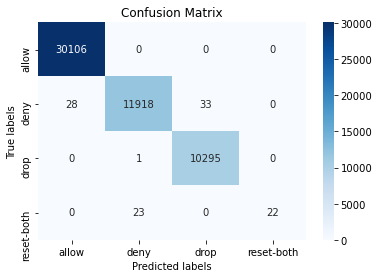

In [29]:
ax= plt.subplot()

cm_Result = confusion_matrix(y_test, preds)
sns.heatmap(cm_Result, cmap="Blues", annot=True, fmt='d', ax=ax) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']); ax.yaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']);




### Did not Run this because it took too long

In [30]:

# %%time
# my_new_model = SVC(C=1, verbose=True)
# result = []
# for m in ['linear', 'poly', 'rbf', 'sigmoid']:
#     my_new_model.kernel = m
#     print(m)
#     for i in [1E-2, 1E-1, 1, 10]:
#         print(i)
#         my_new_model.C = i
#         my_new_model_Fit = my_new_model.fit(X_train, y_train)
#         my_new_model_Score = my_new_model.score(X_test, y_test)
#         my_new_model_preds = my_new_model.predict(X_test)
#         print(m, i, C, Score)
#         result.append({
#             "Kernel": m,
#             'C': i,
#             'Model_Fit': my_new_model_Fit,
#             'Score': my_new_model_Score,
#             'Preds': my_new_model_preds,
#             })

# result = pd.DataFrame(result)
# display(result)  
# result.to_csv(r'csv/result.csv')


# SGD

In [31]:
from sklearn.linear_model import SGDClassifier
# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
clf_Base = SGDClassifier(loss="log", penalty="l2", max_iter=1000, n_jobs=-1)

In [32]:
%%time
clf_Base.fit(X_train, y_train)

CPU times: user 3min 11s, sys: 1min 15s, total: 4min 26s
Wall time: 4min 28s


SGDClassifier(loss='log', n_jobs=-1)

In [33]:
%%time
clf_Base.score(X_test, y_test)


CPU times: user 1min 3s, sys: 43.1 s, total: 1min 46s
Wall time: 1min 39s


0.5742570480296036

In [34]:
# import pickle
# # Save Pickle
# with open('clf_pkl', 'wb') as files:
#     pickle.dump(clf_Base, files)

In [35]:
%%time
clf_Base_preds = clf_Base.predict(X_test)

CPU times: user 1min 2s, sys: 43 s, total: 1min 45s
Wall time: 1min 39s


In [36]:
%%time
clf_Base_Score = clf_Base.score(X_test, y_test)


CPU times: user 1min 3s, sys: 43.4 s, total: 1min 46s
Wall time: 1min 40s


In [37]:
clf_Base_Score

0.5742570480296036

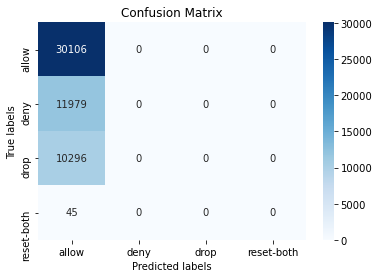

In [38]:
ax= plt.subplot()

cm_Result_CLF = confusion_matrix(y_test, clf_Base_preds)
sns.heatmap(cm_Result_CLF, cmap="Blues", annot=True, fmt='d', ax=ax) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']); ax.yaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']);



In [39]:
# Test
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# SGD Optimizer

In [40]:
clf = SGDClassifier(loss="log", penalty="l2", max_iter=1000)

In [49]:
%%time
result = []
for m in ['log', 'hinge','modified_huber', 'squared_hinge', 'perceptron']:
#     clf.loss = m
#     print(clf)
    for i in [1E-4, 1E-3,1E-2, 1E-1, 1E+0, 1E+1]:
#         print(i)
#         clf.alpha = i
        clf = SGDClassifier(loss=m, alpha=i, penalty="l2", max_iter=1000)
        print(clf)
        print("Fitting")
        clf_Fit = clf.fit(X_train, y_train)
        print("Scoring")
        clf_Score = clf.score(X_test, y_test)
#         print(clf_Score)
#         print("Predicting")
#         clf_preds = clf.predict(X_test)
        print(m, i, clf_Score)
        print("Appending to Dict")
        result.append({
            "Loss": m,
            'Alpha': i,
            'Model_Fit': clf,
            'Score': clf_Score,
#             'Preds': clf_preds,
            })

result = pd.DataFrame(result)
display(result)  
result.to_csv(r'result.csv')


SGDClassifier(alpha=0.001, loss='log')
Fitting
Scoring
0.9388852859268302
log 0.001 0.9388852859268302
Appending to Dict
SGDClassifier(alpha=0.01, loss='log')
Fitting
Scoring
0.9744973867928127
log 0.01 0.9744973867928127
Appending to Dict
SGDClassifier(alpha=0.1, loss='log')
Fitting
Scoring
0.5742570480296036
log 0.1 0.5742570480296036
Appending to Dict
SGDClassifier(alpha=1.0, loss='log')
Fitting
Scoring
0.5742570480296036
log 1.0 0.5742570480296036
Appending to Dict
SGDClassifier(alpha=10.0, loss='log')
Fitting
Scoring
0.5742570480296036
log 10.0 0.5742570480296036
Appending to Dict
SGDClassifier(alpha=0.001)
Fitting
Scoring
0.9900621828863541
hinge 0.001 0.9900621828863541
Appending to Dict
SGDClassifier(alpha=0.01)
Fitting
Scoring
0.9433105710906802
hinge 0.01 0.9433105710906802
Appending to Dict
SGDClassifier(alpha=0.1)
Fitting
Scoring
0.9575973753481097
hinge 0.1 0.9575973753481097
Appending to Dict
SGDClassifier(alpha=1.0)
Fitting
Scoring
0.7941479418609088
hinge 1.0 0.79414794

,Loss,Alpha,Model_Fit,Score
0,log,0.001,"SGDClassifier(alpha=0.001, loss='log')",0.938885
1,log,0.010,"SGDClassifier(alpha=0.01, loss='log')",0.974497
2,log,0.100,"SGDClassifier(alpha=0.1, loss='log')",0.574257
3,log,1.000,"SGDClassifier(alpha=1.0, loss='log')",0.574257
4,log,10.000,"SGDClassifier(alpha=10.0, loss='log')",0.574257
5,hinge,0.001,SGDClassifier(alpha=0.001),0.990062
6,hinge,0.010,SGDClassifier(alpha=0.01),0.943311
7,hinge,0.100,SGDClassifier(alpha=0.1),0.957597
8,hinge,1.000,SGDClassifier(alpha=1.0),0.794148
9,hinge,10.000,SGDClassifier(alpha=10.0),0.574257


CPU times: user 2h 28min 7s, sys: 1h 19min 20s, total: 3h 47min 28s
Wall time: 5h 10min 27s


In [52]:
result = result.sort_values(by='Score', ascending=False)
result_90 = result.loc[result["Score"]>.80]
# result_90 = result_90.drop(['Model_Fit'], axis=1)
result_90.style.hide_index()



Loss,Alpha,Model_Fit,Score
hinge,0.001000,SGDClassifier(alpha=0.001),0.990062
perceptron,0.001000,"SGDClassifier(alpha=0.001, loss='perceptron')",0.975623
log,0.010000,"SGDClassifier(alpha=0.01, loss='log')",0.974497
squared_hinge,0.001000,"SGDClassifier(alpha=0.001, loss='squared_hinge')",0.971236
hinge,0.100000,SGDClassifier(alpha=0.1),0.957597
hinge,0.010000,SGDClassifier(alpha=0.01),0.943311
log,0.001000,"SGDClassifier(alpha=0.001, loss='log')",0.938885
modified_huber,0.001000,"SGDClassifier(alpha=0.001, loss='modified_huber')",0.869759


In [77]:
clf_Search = SGDClassifier(loss="hinge", n_jobs=-1, alpha=0.001, penalty="l2", max_iter=10000)
clf_Search.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=10000, n_jobs=-1)

In [78]:
clf_Search_Score = clf_Search.score(X_test, y_test)
clf_Search_Score

0.734063251058635

In [79]:
clf_Search_Preds = clf_Search.predict(X_test)

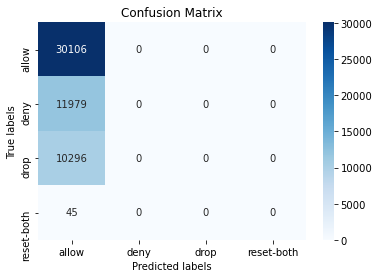

In [80]:
ax= plt.subplot()

cm_CLF = confusion_matrix(y_test, clf_Search_Preds)
sns.heatmap(cm_Result_CLF, cmap="Blues", annot=True, fmt='d', ax=ax) # for decimal
 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']); ax.yaxis.set_ticklabels(['allow', 'deny', 'drop', 'reset-both']);



In [47]:
### import pickle3
# # Save Pickle
# with open('random_result', 'wb') as files:
#     pickle.dump(random_result, files)

In [48]:
### %%time
# loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] 
# 1
# learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
# eta = [0]

# param_distributions = dict(loss=loss, 
# alpha = alpha,
# learning_rate=learning_rate, 
# eta=eta)
# sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
# random = RandomizedSearchCV(estimator=sgd, cv=3,param_distributions=param_distributions, scoring='accuracy', verbose=1, n_jobs=-1) 
# random_result = random.fit(X_train, y_train) 
# print('Best Score: ', random_result.best_score_) 
# print('Best Params: ', random_result.best_params_) 